In [1]:
import pandas as pd
from pandas import read_csv
import glob
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the file Information households containing the type of tariff and acorn group for each household
folder = "/Users/mariabelenalberti/OneDrive - Universidad Torcuato Di Tella/Tesis/smart-meters-in-london/"
filename = "informations_households.csv"
households = pd.read_csv(folder + filename)

In [3]:
households.head()

,LCLid,stdorToU,Acorn,Acorn_grouped,file
0,MAC005492,ToU,ACORN-,ACORN-,block_0
1,MAC001074,ToU,ACORN-,ACORN-,block_0
2,MAC000002,Std,ACORN-A,Affluent,block_0
3,MAC003613,Std,ACORN-A,Affluent,block_0
4,MAC003597,Std,ACORN-A,Affluent,block_0


In [5]:
len(households)

5566

In [4]:
# Output with the the amount of households per acorn
groupby_acorn = households.groupby(['Acorn_grouped']).count().reset_index()
groupby_acorn

,Acorn_grouped,LCLid,stdorToU,Acorn,file
0,ACORN-,2,2,2,2
1,ACORN-U,49,49,49,49
2,Adversity,1816,1816,1816,1816
3,Affluent,2192,2192,2192,2192
4,Comfortable,1507,1507,1507,1507


In [6]:
# Output with the amount of household assigned to each type of tariff
groupby_tariff = households.groupby(['stdorToU']).count().reset_index()
groupby_tariff[['stdorToU','LCLid']]

,stdorToU,LCLid
0,Std,4443
1,ToU,1123


In [7]:
# Load the files (blocks) containing the information of energy consumption for every household every half hour

folder = "/Users/mariabelenalberti/OneDrive - Universidad Torcuato Di Tella/Tesis/smart-meters-in-london/halfhourly_dataset/"
filename = "block_0.csv"
block_0 = pd.read_csv(folder + filename)

In [8]:
block_0.head()

,LCLid,tstp,energy(kWh/hh)
0,MAC000002,2012-10-12 00:30:00.0000000,0
1,MAC000002,2012-10-12 01:00:00.0000000,0
2,MAC000002,2012-10-12 01:30:00.0000000,0
3,MAC000002,2012-10-12 02:00:00.0000000,0
4,MAC000002,2012-10-12 02:30:00.0000000,0


In [9]:
# Load all the blocks and concatenate them into one database
path = '/Users/mariabelenalberti/OneDrive - Universidad Torcuato Di Tella/Tesis/smart-meters-in-london/halfhourly_dataset' # use your path
all_files = glob.glob(path + "/*.csv")

lista = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    lista.append(df)

halfhourly_consumption = pd.concat(lista, axis=0, ignore_index=True)

/Users/mariabelenalberti/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [11]:
len(halfhourly_consumption)

167817021

In [12]:
halfhourly_consumption.head()

,LCLid,tstp,energy(kWh/hh)
0,MAC000027,2011-12-07 11:30:00.0000000,0.185
1,MAC000027,2011-12-07 12:00:00.0000000,0.155
2,MAC000027,2011-12-07 12:30:00.0000000,0.147
3,MAC000027,2011-12-07 13:00:00.0000000,0.164
4,MAC000027,2011-12-07 13:30:00.0000000,0.187


In [15]:
# Load the file containing the energy consumption for each household on a dalily basis

folder = "/Users/mariabelenalberti/OneDrive - Universidad Torcuato Di Tella/Tesis/smart-meters-in-london/daily_dataset.csv/"
filename = "daily_dataset.csv"
daily_df = pd.read_csv(folder + filename)

In [16]:
daily_df.head()

,LCLid,day,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min
0,MAC000131,2011-12-15,0.4850,0.432045,0.868,22,0.239146,9.505,0.072
1,MAC000131,2011-12-16,0.1415,0.296167,1.116,48,0.281471,14.216,0.031
2,MAC000131,2011-12-17,0.1015,0.189812,0.685,48,0.188405,9.111,0.064
3,MAC000131,2011-12-18,0.1140,0.218979,0.676,48,0.202919,10.511,0.065
4,MAC000131,2011-12-19,0.1910,0.325979,0.788,48,0.259205,15.647,0.066


In [31]:
daily_df.describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))

,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min
count,3.5104e+06,3.5104e+06,3.5104e+06,3.51043e+06,3.4991e+06,3.5104e+06,3.5104e+06
mean,0.158739,0.21173,0.834521,47.8036,0.172667,10.1241,0.0596258
std,0.170186,0.190846,0.668316,2.81098,0.153121,9.12879,0.0870131
min,0,0,0,0,0,0,0
25%,0.067,0.0980833,0.346,48,0.0691163,4.682,0.02
50%,0.1145,0.163292,0.688,48,0.132791,7.815,0.039
75%,0.191,0.262458,1.128,48,0.229312,12.569,0.071
max,6.9705,6.92825,10.761,48,4.02457,332.556,6.524


In [17]:
# When reading the csv, the column containing the date is read as an object and here we trasform it to the adecuate type
daily_df['timestamp']= pd.to_datetime(daily_df['day'],format = '%Y-%m-%d')

# We extract the year, month and then concatenate them into a new column to ease further analysis (group by)
daily_df['year'] = pd.DatetimeIndex(daily_df['timestamp']).year
daily_df['month'] = pd.DatetimeIndex(daily_df['timestamp']).month
daily_df['Date'] = pd.to_datetime(daily_df.year.astype(str) + '-' + daily_df.month.astype(str))

In [19]:
# Output with the mean energry consumption for each column
monthly = daily_df.groupby(['Date']).mean().reset_index()
monthly

,Date,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min,year,month
0,2011-11-01,0.176473,0.222984,0.780116,43.008671,0.162130,9.330864,0.069829,2011.0,11.0
1,2011-12-01,0.203760,0.263471,0.972818,47.037667,0.206997,12.308417,0.071812,2011.0,12.0
2,2012-01-01,0.198863,0.270916,1.062783,47.705616,0.227016,12.904206,0.071282,2012.0,1.0
3,2012-02-01,0.199324,0.281165,1.115275,47.673779,0.243910,13.381499,0.071056,2012.0,2.0
4,2012-03-01,0.160082,0.231747,0.982485,47.700452,0.208645,11.044676,0.060115,2012.0,3.0
5,2012-04-01,0.157669,0.217975,0.899760,47.568730,0.188055,10.362338,0.058106,2012.0,4.0
6,2012-05-01,0.138803,0.187007,0.776103,47.430769,0.155869,8.866329,0.055099,2012.0,5.0
7,2012-06-01,0.135031,0.178524,0.731233,47.090330,0.146634,8.445220,0.055137,2012.0,6.0
8,2012-07-01,0.131137,0.173248,0.713574,47.861581,0.139597,8.289806,0.054163,2012.0,7.0
9,2012-08-01,0.129477,0.168760,0.677830,47.957051,0.131505,8.093471,0.055197,2012.0,8.0


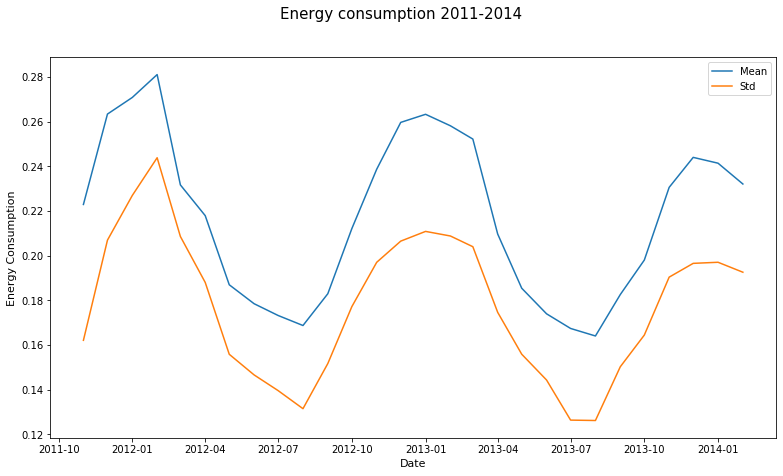

In [60]:
# Plot visualizing the previous output with the mean energy consumption for each month through the period 2011-2014
plt.figure(1, figsize=(13,7)) # Figure size in inches (size_x, size_y)
plt.suptitle('Energy consumption 2011-2014', fontsize=15)
plt.plot('Date', 'energy_mean', data = monthly)
plt.plot('Date', 'energy_std', data = monthly)
my_labels = ['Mean', 'Std']
plt.legend(labels = my_labels)
plt.ylabel('Energy Consumption', fontsize = 11) #for y label
plt.xlabel('Date', fontsize = 11) #for x label
plt.savefig('/Users/mariabelenalberti/Downloads/plot_daily_dataset')

In [21]:
# Load the file containing the information regarding weather variables on a dialy basis

folder = "/Users/mariabelenalberti/OneDrive - Universidad Torcuato Di Tella/Tesis/smart-meters-in-london/"
filename = "weather_daily_darksky.csv"
weather_daily = pd.read_csv(folder + filename)

In [22]:
weather_daily.head()

,temperatureMax,temperatureMaxTime,windBearing,icon,dewPoint,temperatureMinTime,cloudCover,windSpeed,pressure,apparentTemperatureMinTime,...,temperatureHigh,sunriseTime,temperatureHighTime,uvIndexTime,summary,temperatureLowTime,apparentTemperatureMin,apparentTemperatureMaxTime,apparentTemperatureLowTime,moonPhase
0,11.96,2011-11-11 23:00:00,123,fog,9.40,2011-11-11 07:00:00,0.79,3.88,1016.08,2011-11-11 07:00:00,...,10.87,2011-11-11 07:12:14,2011-11-11 19:00:00,2011-11-11 11:00:00,Foggy until afternoon.,2011-11-11 19:00:00,6.48,2011-11-11 23:00:00,2011-11-11 19:00:00,0.52
1,8.59,2011-12-11 14:00:00,198,partly-cloudy-day,4.49,2011-12-11 01:00:00,0.56,3.94,1007.71,2011-12-11 02:00:00,...,8.59,2011-12-11 07:57:02,2011-12-11 14:00:00,2011-12-11 12:00:00,Partly cloudy throughout the day.,2011-12-12 07:00:00,0.11,2011-12-11 20:00:00,2011-12-12 08:00:00,0.53
2,10.33,2011-12-27 02:00:00,225,partly-cloudy-day,5.47,2011-12-27 23:00:00,0.85,3.54,1032.76,2011-12-27 22:00:00,...,10.33,2011-12-27 08:07:06,2011-12-27 14:00:00,2011-12-27 00:00:00,Mostly cloudy throughout the day.,2011-12-27 23:00:00,5.59,2011-12-27 02:00:00,2011-12-28 00:00:00,0.10
3,8.07,2011-12-02 23:00:00,232,wind,3.69,2011-12-02 07:00:00,0.32,3.00,1012.12,2011-12-02 07:00:00,...,7.36,2011-12-02 07:46:09,2011-12-02 12:00:00,2011-12-02 10:00:00,Partly cloudy throughout the day and breezy ov...,2011-12-02 19:00:00,0.46,2011-12-02 12:00:00,2011-12-02 19:00:00,0.25
4,8.22,2011-12-24 23:00:00,252,partly-cloudy-night,2.79,2011-12-24 07:00:00,0.37,4.46,1028.17,2011-12-24 07:00:00,...,7.93,2011-12-24 08:06:15,2011-12-24 15:00:00,2011-12-24 13:00:00,Mostly cloudy throughout the day.,2011-12-24 19:00:00,-0.51,2011-12-24 23:00:00,2011-12-24 20:00:00,0.99


In [26]:
weather_daily = weather_daily[['temperatureMax','temperatureMaxTime','pressure','windSpeed']]

In [27]:
weather_daily.head()

,temperatureMax,temperatureMaxTime,pressure,windSpeed
0,11.96,2011-11-11 23:00:00,1016.08,3.88
1,8.59,2011-12-11 14:00:00,1007.71,3.94
2,10.33,2011-12-27 02:00:00,1032.76,3.54
3,8.07,2011-12-02 23:00:00,1012.12,3.00
4,8.22,2011-12-24 23:00:00,1028.17,4.46


In [28]:
# When reading the csv, the column containing the date is read as an object and here we trasform it to the adecuate type
weather_daily['timestamp']= pd.to_datetime(weather_daily['temperatureMaxTime'],format = '%Y-%m-%d')

# We extract the year, month and then concatenate them into a new column to ease further analysis (group by)
weather_daily['year'] = pd.DatetimeIndex(weather_daily['timestamp']).year
weather_daily['month'] = pd.DatetimeIndex(weather_daily['timestamp']).month
weather_daily['Date'] = pd.to_datetime(weather_daily.year.astype(str) + '-' + weather_daily.month.astype(str))

In [29]:
monthly_weather = weather_daily.groupby(['Date']).mean().reset_index()

In [30]:
monthly_weather.head()

,Date,temperatureMax,pressure,windSpeed,year,month
0,2011-11-01,13.034667,1017.059000,3.315667,2011,11
1,2011-12-01,9.282903,1011.890323,4.697742,2011,12
2,2012-01-01,9.083871,1021.069355,4.150645,2012,1
3,2012-02-01,7.440690,1029.737241,3.258276,2012,2
4,2012-03-01,13.829677,1027.748387,2.547419,2012,3


/Users/mariabelenalberti/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


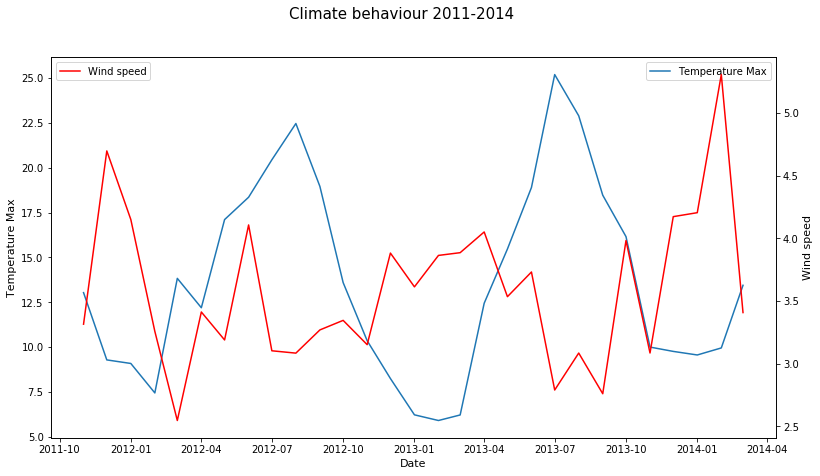

In [31]:
fig, ax1 = plt.subplots(1,figsize=(13,7))
ax2 = ax1.twinx()
fig.suptitle('Climate behaviour 2011-2014', fontsize=15)
ax1.plot('Date', 'temperatureMax', data = monthly_weather)
ax2.plot('Date','windSpeed',data = monthly_weather, color = 'red')

my_labels_1 = ['Temperature Max']
my_labels_2 = ['Wind speed']
ax1.legend(labels = my_labels_1)
ax2.legend(labels = my_labels_2,loc="upper left")
ax1.set_ylabel('Temperature Max', fontsize = 11) #for y label
ax1.set_xlabel('Date', fontsize = 11) #for x label
ax2.set_ylabel('Wind speed', fontsize = 11) #for y label
plt.savefig('/Users/mariabelenalberti/Downloads/plot_temperature_daily')

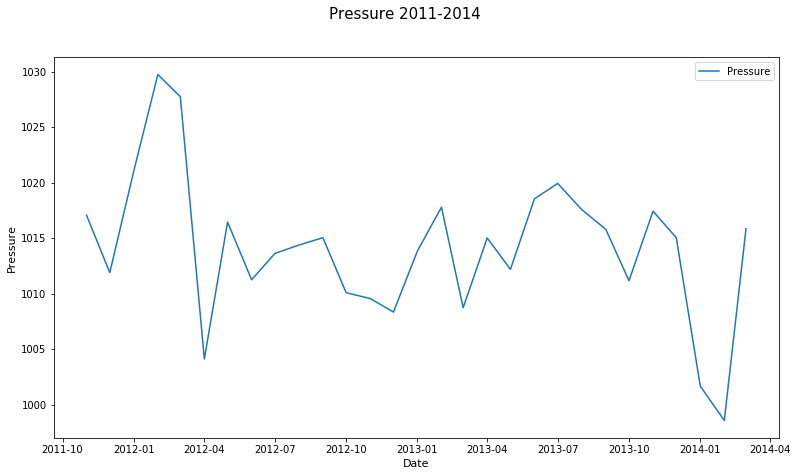

In [32]:
plt.figure(1, figsize=(13,7)) # Figure size in inches (size_x, size_y)
plt.suptitle('Pressure 2011-2014', fontsize=15)
plt.plot('Date', 'pressure', data = monthly_weather)
my_labels = ['Pressure']
plt.legend(labels = my_labels)
plt.ylabel('Pressure', fontsize = 11) #for y label
plt.xlabel('Date', fontsize = 11) #for x label
plt.savefig('/Users/mariabelenalberti/Downloads/plot_pressure_weather')

In [2]:
# Load the file containing the information regarding weather variables on an hourly basis

folder = "/Users/mariabelenalberti/Documents/smart-meters-in-london/"
filename = "weather_hourly_darksky.csv"
weather_hourly = pd.read_csv(folder + filename)

In [4]:
weather_hourly.head()

,timestamp,visibility,windBearing,temperature,dewPoint,pressure,apparentTemperature,windSpeed,humidity
0,01/01/2012 00:00,12.99,229,12.12,10.97,1008.10,12.12,5.90,0.93
1,01/01/2012 00:30,12.99,229,12.12,10.97,1008.10,12.12,5.90,0.93
2,01/01/2012 01:00,12.89,238,12.59,11.02,1007.88,12.59,6.06,0.90
3,01/01/2012 01:30,12.89,238,12.59,11.02,1007.88,12.59,6.06,0.90
4,01/01/2012 02:00,11.54,229,12.45,11.04,1007.95,12.45,5.31,0.91


In [3]:
weather_hourly_small = weather_hourly[['temperature','timestamp','pressure','apparentTemperature','windSpeed','humidity']]

KeyError: "['time'] not in index"

In [37]:
weather_hourly_small.head()

,temperature,time,pressure,apparentTemperature,windSpeed,humidity
0,12.12,01/01/2012 00:00,1008.10,12.12,5.90,0.93
1,12.59,01/01/2012 01:00,1007.88,12.59,6.06,0.90
2,12.45,01/01/2012 02:00,1007.95,12.45,5.31,0.91
3,12.03,01/01/2012 03:00,1007.66,12.03,4.68,0.93
4,12.04,01/01/2012 04:00,1007.60,12.04,4.90,0.92


In [38]:
weather_hourly_small.describe()

,temperature,pressure,apparentTemperature,windSpeed,humidity
count,17542.000000,17531.000000,17542.000000,17542.000000,17542.000000
mean,10.933022,1015.149696,9.823866,3.779635,0.776247
std,6.076351,10.797618,7.221867,1.972305,0.144233
min,-5.640000,975.740000,-8.880000,0.040000,0.230000
25%,6.700000,1008.680000,4.300000,2.320000,0.690000
50%,10.680000,1015.490000,10.680000,3.580000,0.810000
75%,15.210000,1022.680000,15.210000,4.937500,0.890000
max,32.400000,1043.320000,32.420000,14.560000,1.000000


In [3]:
# Load the file containing the type of tariff applied on each timestamp.
folder = "/Users/mariabelenalberti/OneDrive - Universidad Torcuato Di Tella/Tesis/smart-meters-in-london/"
filename = "tariffs.csv"
tariffs = pd.read_csv(folder + filename)

In [4]:
tariffs.head()

,TariffDateTime,Tariff,Price
0,01/01/2013 00:00,Normal,11.76
1,01/01/2013 00:30,Normal,11.76
2,01/01/2013 01:00,Normal,11.76
3,01/01/2013 01:30,Normal,11.76
4,01/01/2013 02:00,Normal,11.76


In [6]:
# Output showing the amount of times each type of tariff was applied through out the years 2012-2013
groupby_tariff_1 = tariffs.groupby(['Tariff']).count().reset_index()
groupby_tariff_1

,Tariff,TariffDateTime,Price
0,High,788,788
1,Low,1660,1660
2,Normal,15072,15072
